In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # high level interface for drawing attractive and informative statistical graphics
from sklearn.model_selection import train_test_split # the train test_split_function is used to split datasets into training and testing sets for machine learning model training and evaluation.
from sklearn.linear_model import LogisticRegression # logisticRegression is a supervised ML algo use for binary classification tasks.
from sklearn.metrics import accuracy_score # to evaluate the accuracy of classification models by comparing predicted labels with true labels.



#### Preprocessing the train.csv file

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TitanicProject-LogisticRegression/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
train_df.isna().sum() #Missing Data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [116]:
# Detelete Cabin Column because we have 687 missing values.
df= train_df.drop(columns='Cabin',axis=1)


In [117]:
#Replace missing values in "Age" with mean value & missin values in "Embarked" with 'mode' value.
df.fillna({'Age': df['Age'].mean()}, inplace=True)
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


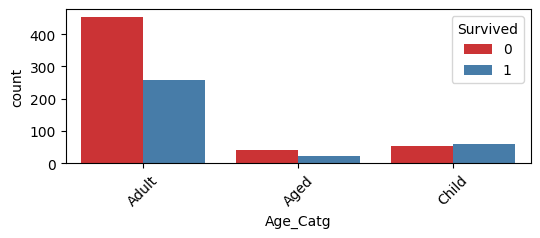

In [119]:

def catg_Age(age):
  if age < 18:
    return 'Child'
  if age > 50:
    return 'Aged'
  else:
    return 'Adult'

df['Age_Catg'] = df['Age'].apply(catg_Age)
plt.figure(figsize=(6,2))
sns.countplot(x='Age_Catg', hue='Survived',data=df, palette='Set1', dodge=True)
plt.xticks(rotation=45)
plt.show()


#


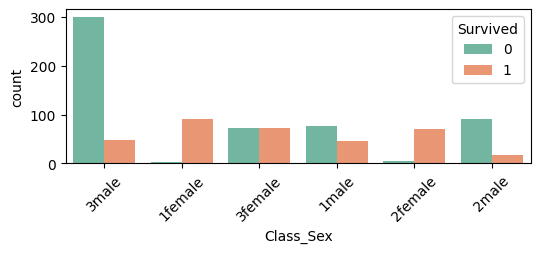

In [120]:
df['Pclass']= df['Pclass'].astype(str)
df['Class_Sex'] = df['Pclass'] + '' + df['Sex']

plt.figure(figsize=(6,2))
sns.countplot(x='Class_Sex', hue='Survived',data=df,palette='Set2',dodge=True)
plt.xticks(rotation=45)
plt.show()


# We can see here that a significant number of male in class 3 did not survive


In [121]:
df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables:

<ipython-input-121-1d68284d9d3a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables:


In [122]:
#Feature Selection
X= df.drop(columns=['PassengerId','Survived','Name','Ticket','Age_Catg','Class_Sex']) #These remaining columns are the features that I will use for training a machine learning model.
Y= df['Survived'] #Target Label


In [123]:
#Train-Test Split:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
# 20% of the data will be used for testing, and the remaining 80% will be used for training.
print(X.shape,X_train.shape, X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


In [124]:
model = LogisticRegression()
model.fit(X_train,Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
X_train_pred = model.predict(X_train)
training_accuracy= accuracy_score(Y_train, X_train_pred)
training_accuracy

0.8117977528089888

In [126]:
Y_test_pred = model.predict(X_test)
test_accuracy= accuracy_score(Y_test, Y_test_pred)
test_accuracy

0.7821229050279329

####Preprocessing the Test.csv file

In [140]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TitanicProject-LogisticRegression/test.csv')
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [147]:
test_df.drop(columns='Cabin', inplace=True)
test_df.fillna({'Age': test_df['Age'].mean()}, inplace=True)
test_df.fillna({'Fare': test_df['Fare'].mean()}, inplace=True)
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [149]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [150]:
test_df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables

<ipython-input-150-e43a0a1cd84c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables:


In [151]:
X_final_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)

In [155]:
predictions = model.predict(X_final_test)



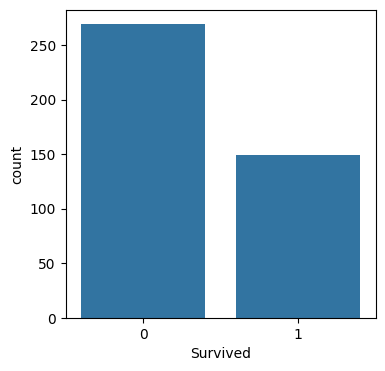

In [162]:
#Create the DF
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'],'Survived': predictions})
plt.figure(figsize=(4,4))
sns.countplot(x='Survived',data=submission_df)
plt.show()


In [ ]:
submission_df.to_csv('submission.csv', index=False)